In [1]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory
import numpy

In [2]:
# TRAIN = image_dataset_from_directory("../dataset/train/", label_mode="categorical", color_mode='grayscale')
train_ds = image_dataset_from_directory(
    "../dataset/train/",
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode="categorical", color_mode='grayscale')
val_ds = image_dataset_from_directory(
    "../dataset/train/",
    validation_split=0.2,
    seed=42,
    subset="validation", label_mode="categorical", color_mode='grayscale'
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-01 10:10:47.514549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-01 10:10:47.514898: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [3]:
TEST = image_dataset_from_directory("../dataset/test/", label_mode="categorical", color_mode='grayscale')

Found 1279 files belonging to 4 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


2022-11-01 10:10:48.265983: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


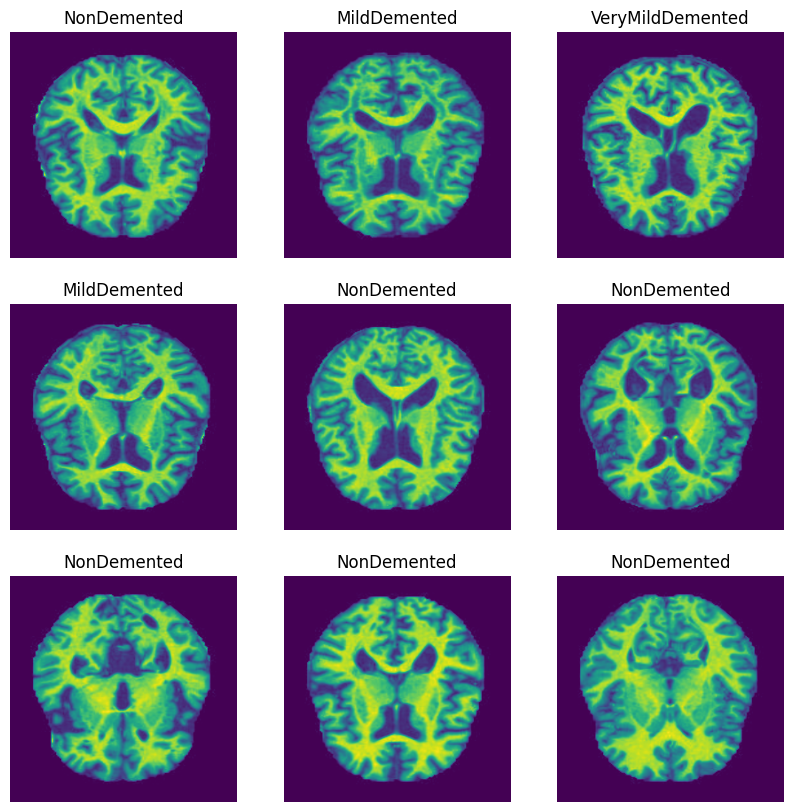

In [5]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[numpy.argmax(labels[i])])
        plt.axis("off")


In [6]:
input_shape = (256, 256, 1)
model = Sequential()
model.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4, activation="softmax"))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [7]:
epochs = 10
history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

Epoch 1/10


2022-11-01 10:10:49.665230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - ETA: 0s - loss: 332.0659 - accuracy: 0.4774

2022-11-01 10:13:08.338388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


129/129 [==============================] - 148s 1s/step - loss: 332.0659 - accuracy: 0.4774 - val_loss: 1.0157 - val_accuracy: 0.5195
Epoch 2/10
129/129 [==============================] - 139s 1s/step - loss: 1.0466 - accuracy: 0.4950 - val_loss: 1.0130 - val_accuracy: 0.5195
Epoch 3/10
129/129 [==============================] - 137s 1s/step - loss: 1.0478 - accuracy: 0.4950 - val_loss: 1.0137 - val_accuracy: 0.5195
Epoch 4/10
 88/129 [===================>..........] - ETA: 42s - loss: 1.0419 - accuracy: 0.5021

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
